In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
df=pd.read_csv("spam.csv", encoding='Latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df=df[['v1','v2']]
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df = df[['v1', 'v2']]
df.columns = ['category', 'message']
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
x=df['message'].values
y=df['category'].values

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


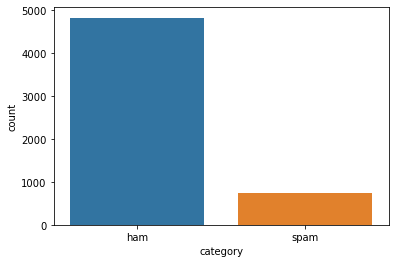

In [15]:
sns.countplot(df['category'])
plt.show()

In [24]:
df['category'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: category, dtype: float64

In [25]:
df.isnull().sum()

category    0
message     0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [29]:
import nltk

In [30]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
stop_words=stopwords.words('english')

In [31]:
snow=SnowballStemmer('english')

In [35]:
import re

In [41]:
text=[]
 
    
for label in df['message']:
    label=label.lower().strip()
    cleaner=re.compile('<.*?>')
    label=re.sub(cleaner,'',label)
    label=re.sub(r"[^a-zA-z0-9]"," ",label)
    label=re.sub(r'\d+','',label)
    words=[snow.stem(word) for word in label.split() if word not in stopwords.words('english')]
    text.append(' '.join(words))

In [43]:
text[156]

'leav hous'

In [44]:
text[500]

'fight world easi u either win lose bt fightng close u dificult u lose u lose u win u still lose'

In [51]:
count_vect=CountVectorizer(max_features=5000)
bow_data=count_vect.fit_transform(text).toarray()
print(bow_data[1])

[0 0 0 ... 0 0 0]


In [53]:
count_vect.get_feature_names()[:10]

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['____',
 '_thank',
 'aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen']

In [57]:
tf_idf=TfidfVectorizer()
tf_data=tf_idf.fit_transform(text).toarray()
tf_data.shape

(5572, 6302)

In [60]:
tf_idf.get_feature_names()[:10]

['____',
 '_thank',
 'aa',
 'aah',
 'aaniy',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen']

In [66]:
x_train, x_test, y_train, y_test = train_test_split(bow_data,y)

In [67]:
x_train.shape

(4179, 5000)

In [69]:
y_train.shape

(4179,)

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [75]:
lr_bow=LogisticRegression(class_weight='balanced')
lr_bow.fit(x_train,y_train)

LogisticRegression(class_weight='balanced')

In [76]:
y_pred=lr_bow.predict(x_test)
print('acc:',accuracy_score(y_test,y_pred))

acc: 0.9813352476669059


In [78]:
msg="hello every one im fine".lower()


In [79]:
b=count_vect.transform([msg]).toarray()

In [80]:
b.shape

(1, 5000)

In [81]:
lr_bow.predict(b)[0]

'ham'

In [88]:
msg1="Is that seriously how you spell his name?".lower()

In [92]:
d=count_vect.transform([msg1]).toarray()

In [93]:
d.shape

(1, 5000)

In [94]:
lr_bow.predict(d)[0]

'ham'